<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-neighbor-betweenness" data-toc-modified-id="Compare-neighbor-betweenness-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare neighbor betweenness</a></span></li><li><span><a href="#Compare-PCC-sensors-to-GI-data" data-toc-modified-id="Compare-PCC-sensors-to-GI-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare PCC sensors to GI data</a></span></li><li><span><a href="#Check-high-effectivenes-nodes-for-a-given-degree-to-understand-the-topology" data-toc-modified-id="Check-high-effectivenes-nodes-for-a-given-degree-to-understand-the-topology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check high effectivenes nodes for a given degree to understand the topology</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sensor:-sps18-and-neighbors" data-toc-modified-id="Sensor:-sps18-and-neighbors-3.0.0.1"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>Sensor: sps18 and neighbors</a></span></li><li><span><a href="#Sensor:-sps18-and-neighbors" data-toc-modified-id="Sensor:-sps18-and-neighbors-3.0.0.2"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>Sensor: sps18 and neighbors</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Work-on-random-generated-graph" data-toc-modified-id="Work-on-random-generated-graph-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Work on random generated graph</a></span></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from src.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from src.enm import Enm

In [98]:
import seaborn as sns

In [3]:
import statsmodels.api as sm

In [4]:
def plot_prs_subnetwork(gc, enm_obj, attr='eff',node_name='upc2', radius=2,**kwargs):
    if attr == 'eff':
        nx.set_node_attributes(enm_obj.graph_gc,dict(zip(enm_obj.nodes,enm_obj.prs_mat[enm_obj.nodes.index(node_name),:])),attr)
    else:
        nx.set_node_attributes(enm_obj.graph_gc,dict(zip(enm_obj.nodes,enm_obj.prs_mat[:,enm_obj.nodes.index(node_name)])),attr)
    g_sub = nx.ego_graph(enm_obj.graph_gc, node_name,radius)
    return plot_subnetwork(g_sub,attr,**kwargs)

In [5]:
def plot_subnetwork(g_sub,attr, **kwargs):
    import matplotlib.colors as colors
#['red'  if i==node_name else 'blue' for i in g_sub.nodes ]
    val_range = kwargs.pop('val_range',[val for i, val in g_sub.nodes(attr)])
    vmin = min(val_range)
    vmax = max(val_range)
    cmap = plt.cm.viridis_r
    figsize = kwargs.pop("figsize",(10,10))
    fig,ax = plt.subplots(figsize=figsize)
    #p = nx.spring_layout(g_sub)
    nx.draw_networkx_nodes(g_sub, ax=ax, node_color = [val for i, val in g_sub.nodes(attr)],
           cmap=cmap, vmin=vmin, vmax=vmax,**kwargs)
    if kwargs.pop('with_labels',False):
        nx.draw_networkx_labels(g_sub, ax=ax, **kwargs)
    nx.draw_networkx_edges(g_sub, ax=ax,alpha=0.1,**kwargs)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    title = kwargs.pop('node_name','')
    plt.title(title)
    filename = kwargs.pop('filename',None)
    if filename is not None:
        plt.savefig(filename,bbox_inches='tight')
    
    plt.show()
    #print(g_sub.nodes)
    return val_range



In [6]:
os.chdir('../')

In [7]:
data_path = 'data/interim/pcc_prs_0713/'
with open(f'data/interim/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



In [8]:
e_pcc.figure_path = 'reports/figures/pcc_prs_0713/'

In [9]:
# e_pcc.output_path=data_path
# e_pcc.simulate_rewire(sim_num=2) 
# e_pcc.spring_pos()
# with open(f'data/interim/pcc.pickle','wb') as f:
#     pickle.dump(e_pcc,f)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


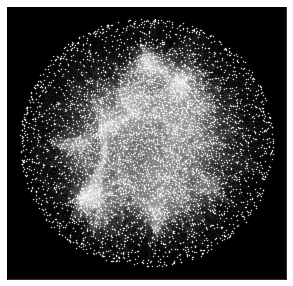

In [8]:
e_pcc.plot_network_spring()

In [10]:
e_pcc.get_prs(no_diag=False)
df=e_pcc.df

@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.6s.
@> Perturbation response scanning completed in 1.9s.


In [11]:
df['norm_eff'] =  df.eff/df.deg

In [81]:
sensors = df.loc[df.sens>np.quantile(df.sens,0.99)]

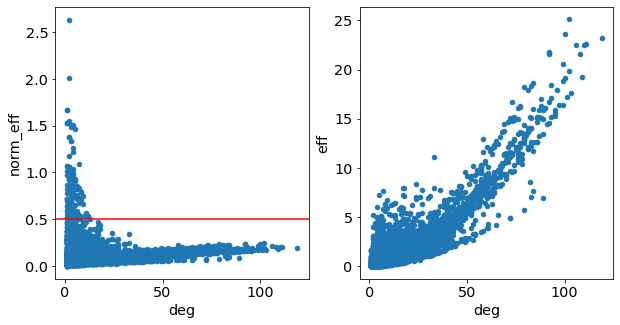

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
df.plot.scatter('deg', 'norm_eff', ax=ax[0])
#ax[0].set_xlim(0,25)
ax[0].axhline(0.5,c='red')
df.plot.scatter('deg', 'eff', ax=ax[1])
#ax[1].set_xlim(0,25)

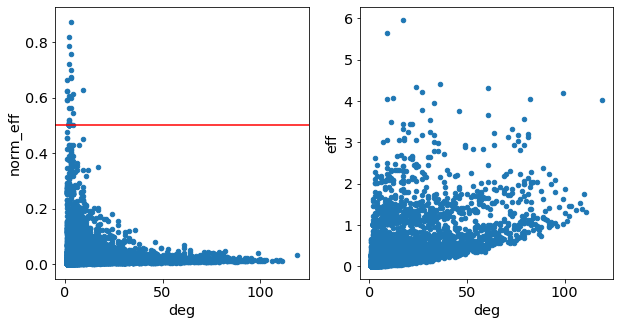

In [12]:
rand_df = e_pcc.e_list[1].df
rand_df['norm_eff'] =  rand_df.eff/rand_df.deg
fig, ax = plt.subplots(1,2, figsize = (10,5))
rand_df.plot.scatter('deg', 'norm_eff', ax=ax[0])
#ax[0].set_xlim(0,25)
ax[0].axhline(0.5,c='red')
rand_df.plot.scatter('deg', 'eff', ax=ax[1])
#ax[1].set_xlim(0,25)

Text(0.5, 0, 'Effectiveness')

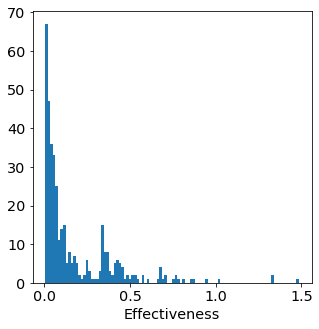

In [13]:
fig, ax = plt.subplots()
plt.hist(df.loc[df.loc[:,'deg']==3,'norm_eff'],bins=100)
ax.set_xlabel('Effectiveness')

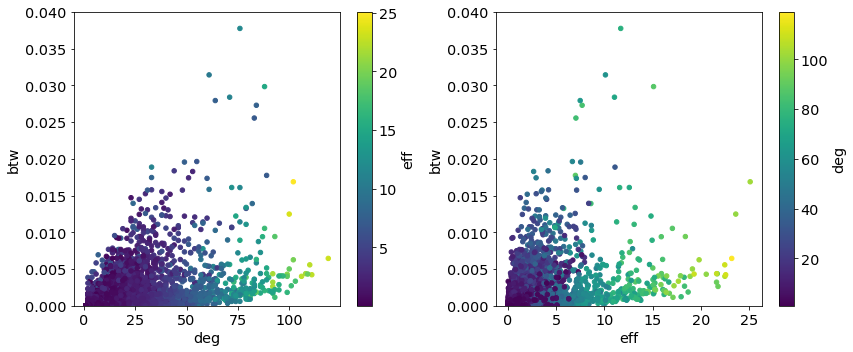

In [14]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
df.plot.scatter('deg','btw',ax=ax[0], c = 'eff',colormap='viridis')
ax[0].set_ylim(0,0.04)
df.plot.scatter('eff','btw',ax=ax[1], c = 'deg',colormap='viridis')
ax[1].set_ylim(0,0.04)
plt.tight_layout()
#ax.plot(x, model.coef_*x+model.intercept_)
#ax.axvline(0.25, c='red')

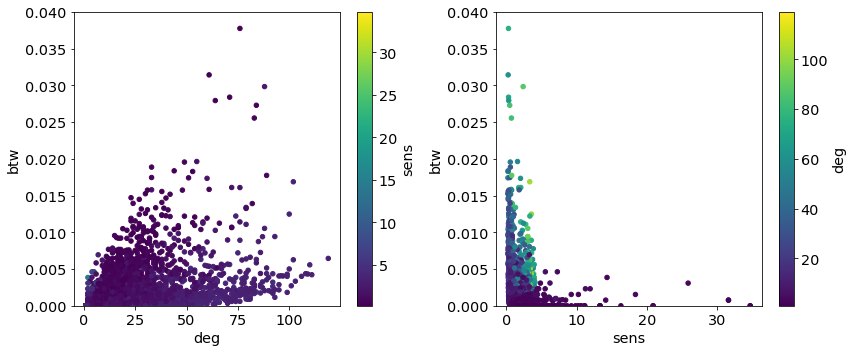

In [36]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
df.plot.scatter('deg','btw',ax=ax[0], c = 'sens',colormap='viridis')
ax[0].set_ylim(0,0.04)
df.plot.scatter('sens','btw',ax=ax[1], c = 'deg',colormap='viridis')
ax[1].set_ylim(0,0.04)
plt.tight_layout()
#ax.plot(x, model.coef_*x+model.intercept_)
#ax.axvline(0.25, c='red')

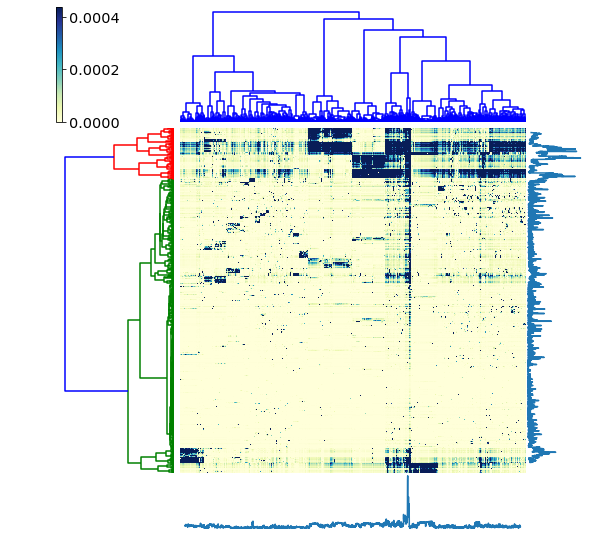

In [37]:
e_pcc.heatmap_annotated()

# Compare neighbor betweenness

In [217]:
neigbor_btw = []
neighbor_degree = []
for i in e_pcc.graph_gc.nodes:
    neigbor_btw.append(np.max([df.loc[df.orf_name==a,'btw'].values for a in nx.neighbors(e_pcc.graph_gc,i)]))
    neighbor_degree.append(np.max([df.loc[df.orf_name==a,'deg'].values for a in nx.neighbors(e_pcc.graph_gc,i)]))

df['neighbor_btw'] = neigbor_btw
df['neighbor_degree'] = neighbor_degree

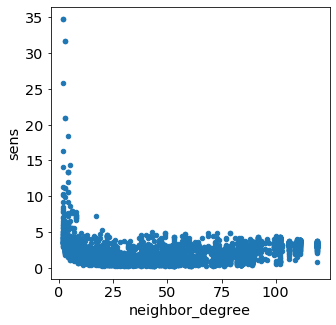

In [220]:
df.plot.scatter('neighbor_degree','sens')

# Compare PCC sensors to GI data

In [72]:
with open('data/interim/gi_0827/gi.pickle','rb') as f:
    e_gi = pickle.load(f)

In [201]:
e_gi.laplacian_matrix(normalized=False)
e_gi.gnm_analysis()

@> 6111 modes were calculated in 36.30s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.6s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.8s.


In [202]:
sensors_on_gi = e_gi.df.loc[e_gi.df.orf_name.isin(sensors.orf_name.values)]

In [203]:
e_gi.df['is_pcc_sensor'] = np.where(e_gi.df.orf_name.isin(sensors_on_gi.orf_name),True,False)


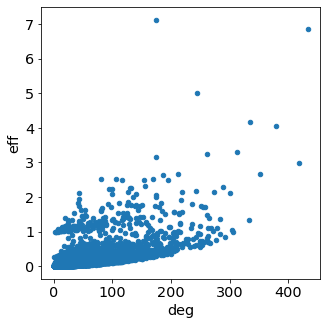

In [204]:
e_gi.df.plot.scatter('deg','eff')

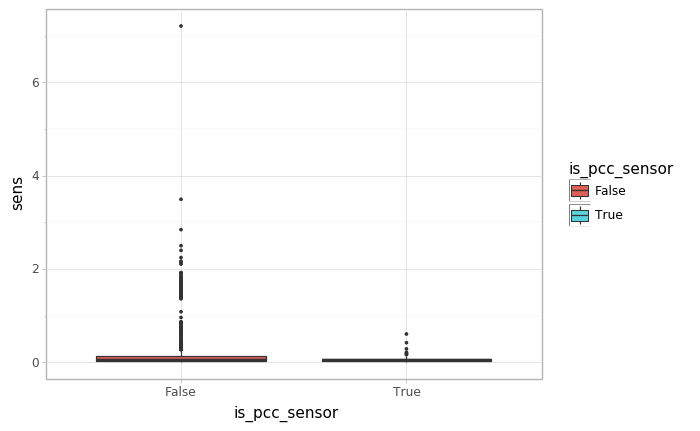

<ggplot: (8779201827457)>

In [208]:
from plotnine import *
(ggplot(e_gi.df,aes('is_pcc_sensor','sens',fill='is_pcc_sensor'))
+ geom_boxplot(outlier_shape='.')
+ theme_light())

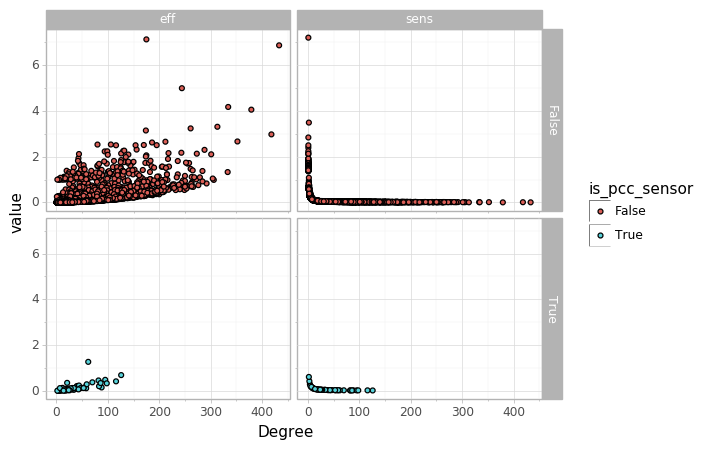

<ggplot: (8779264511713)>

In [206]:
(ggplot(pd.melt(e_gi.df,id_vars=['orf_name','is_pcc_sensor','deg'],value_vars = ['sens','eff']),aes('deg','value',fill='is_pcc_sensor'))
+ geom_point()
+ theme_light()
+ facet_grid('is_pcc_sensor~variable')
+ xlab('Degree')
#+ ylab('Effectiveness'))
)

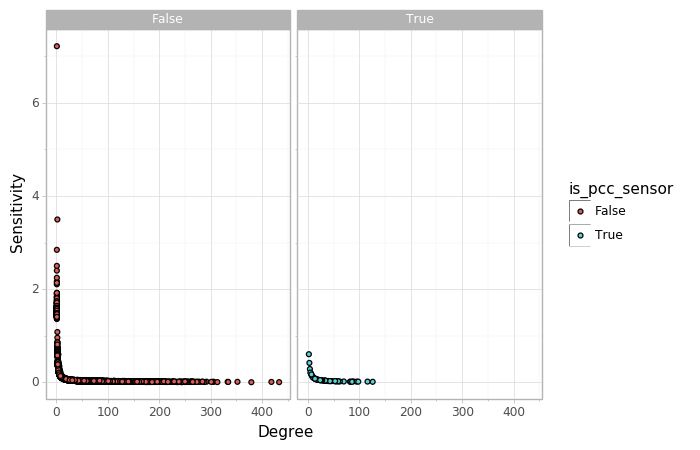

<ggplot: (8779201807785)>

In [209]:
(ggplot(e_gi.df,aes('deg','sens',fill='is_pcc_sensor'))
+ geom_point()
+ theme_light()
+ facet_wrap('~is_pcc_sensor')
+ xlab('Degree')
+ ylab('Sensitivity'))

In [155]:
pos = nx.spring_layout(e_gi.graph_gc, k=0.6, iterations=400)

In [156]:
nx.set_node_attributes(e_gi.graph_gc,pos,'pos')

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


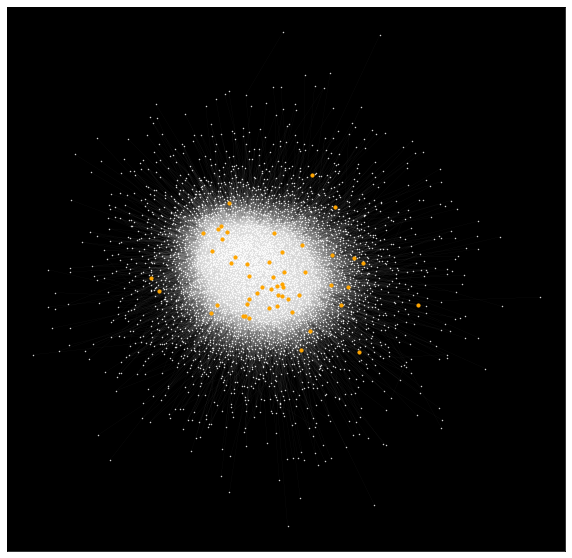

In [212]:

fix, ax = plt.subplots(figsize=(10,10))
e_gi.plot_network_spring(ax=ax)
#nx.draw_networkx_nodes(nx.induced_subgraph(e_gi.graph_gc,e_gi.df.loc[e_gi.df.sens>np.quantile(e_gi.df.sens,0.98),'orf_name']),pos=e_gi.graph_gc.nodes('pos'),ax=ax,node_size=10,node_color='orange')
nx.draw_networkx_nodes(nx.induced_subgraph(e_gi.graph_gc,sensor_on_gi.orf_name),pos=e_gi.graph_gc.nodes('pos'),ax=ax,node_size=10,node_color='orange')

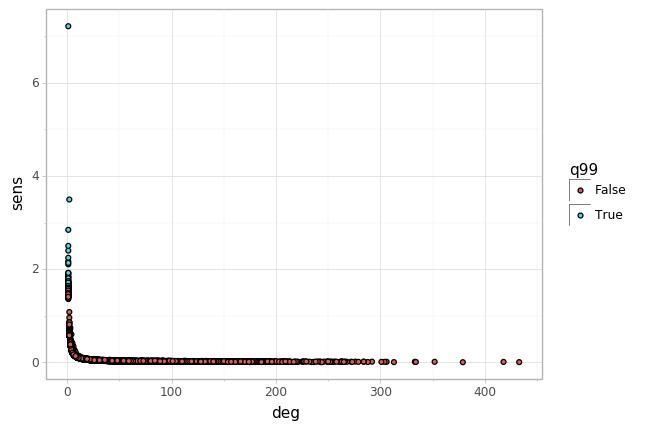

<ggplot: (8778887755853)>

In [211]:
q99 = np.quantile(e_gi.df.sens,0.99)
e_gi.df['q99']= e_gi.df.sens>q99
(ggplot(e_gi.df,aes('deg','sens',fill='q99'))
#+ geom_boxplot(outlier_shape='.')
+ geom_point()
+ theme_light())

# Check high effectivenes nodes for a given degree to understand the topology

In [105]:
grouped = df.groupby('deg')#['eff'].quantile()
grouped.apply(lambda g: g[g['sens']>np.quantile(g['sens'],0.99)])#.orf_name.values

orf_name  deg     eig_0     eig_1     eig_2     eig_3     eig_4  \
deg                                                                           
1   755         agp1    1 -0.001621 -0.017052  0.000049 -0.009071 -0.005859   
    1452     ypl109c    1  0.038604  0.041434 -0.002896  0.018835  0.003453   
    4773        pch2    1 -0.002179 -0.000324  0.001489  0.005572  0.001009   
    4914        rma1    1 -0.001621 -0.017052  0.000049 -0.009071 -0.005859   
    5047        tan1    1 -0.002179 -0.000324  0.001489  0.005572  0.001009   
...              ...  ...       ...       ...       ...       ...       ...   
93  1066  gpi17-5001   93  0.000466 -0.008981  0.001552 -0.000258  0.000965   
95  1433        sys1   95  0.000490 -0.007821  0.000437  0.001838  0.005929   
99  1112    kre5-ts2   99  0.000485 -0.008892  0.001183 -0.000302  0.000690   
100 184         coq1  100  0.000456 -0.001375 -0.001124 -0.000326 -0.000172   
102 188         gep5  102  0.000673 -0.001351 -0.000881 -0.000020  0.000072   

             eig_5     eig_6     eig_7        eff       sens       btw  \
deg                                                                      
1   755   0.000266 -0.004391 -0.000030   1.670132  34.738685  0.000000   
    1452  0.000097  0.007066  0.000055   0.966710  16.315589  0.000000   
    4773 -0.000282 -0.001398  0.000275   1.523264  13.331364  0.000000   
    4914  0.000266 -0.004391 -0.000030   1.670132  34.738685  0.000000   
    5047 -0.000282 -0.001398  0.000275   1.523264  13.331364  0.000000   
...            ...       ...       ...        ...        ...       ...   
93  1066 -0.000588  0.000708  0.004200  17.093919   3.674428  0.001155   
95  1433  0.000021  0.002197  0.001665  15.848196   3.185865  0.002880   
99  1112 -0.000642  0.000504  0.003089  18.868639   3.474958  0.004005   
100 184  -0.000105 -0.000529 -0.002534  23.593161   3.552455  0.012483   
102 188   0.000493 -0.000936 -0.001014  25.085875   3.324261  0.016880   

             trans  eigenvec_centr  closeness_centr  norm_eff  
deg                                                            
1   755   0.000000    2.055907e-15         0.095424  1.670132  
    1452  0.000000    1.661689e-13         0.116497  0.966710  
    4773  0.000000    9.780718e-11         0.137293  1.523264  
    4914  0.000000    2.054349e-15         0.095424  1.670132  
    5047  0.000000    9.780718e-11         0.137293  1.523264  
...            ...             ...              ...       ...  
93  1066  0.468443    8.859404e-02         0.245197  0.183806  
95  1433  0.409630    1.149189e-01         0.252325  0.166823  
99  1112  0.395795    8.372578e-02         0.252571  0.190592  
100 184   0.354747    1.455027e-04         0.260441  0.235932  
102 188   0.266550    1.029078e-04         0.254995  0.245940  

[122 rows x 17 columns]

#### Sensor: sps18 and neighbors

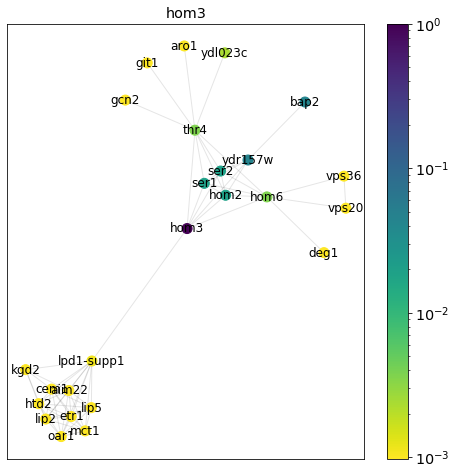

['lpd1-supp1', 'thr4', 'htd2', 'lip5', 'git1', 'aim22', 'ydr157w', 'hom6', 'hom2', 'vps36', 'hom3', 'etr1', 'aro1', 'ser1', 'mct1', 'oar1', 'bap2', 'ydl023c', 'cem1', 'lip2', 'ser2', 'vps20', 'deg1', 'kgd2', 'gcn2']


[0.02061729774612789,
 0.1956485101858232,
 0.0029278079093013414,
 0.00365485896800286,
 0.002816849290453564,
 0.002032349202457599,
 0.5493688228852264,
 0.19597370118708385,
 0.43085301276939225,
 0.0013083762151536581,
 1.0,
 0.0029155889806389366,
 0.00860796678531388,
 0.4308530127693923,
 0.00365485896800285,
 0.002452160024446167,
 0.5437858890902941,
 0.12880716003672493,
 0.0014092991316320207,
 0.0015986511263142488,
 0.4308530127693927,
 0.0009731845538572851,
 0.0040033083729988424,
 0.0012503904197058145,
 0.004212472294584753]

In [192]:
vr = plot_subnetwork(e_pcc.graph_gc,e_pcc,attr='eff',node_name='hom3',radius=2,node_size=100,figsize=(8,8),with_labels=True)    
vr

In [189]:
df.loc[df.orf_name.isin(['ydr157w', 'rma1', 'agp1', 'bap2', 'stp1', 'hom2', 'stp2', 'hom3', 'ser1', 'ser2', 'dal81'])]

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,norm_eff,knn
754,dal81,2,0.002108,0.001594,-0.000104,0.012430,0.007908,-0.000826,0.005730,0.000128,2.762648,31.644245,0.000772,0.000000,1.225156e-13,0.105488,1.381324,2.000000
755,agp1,1,-0.001621,-0.017052,0.000049,-0.009071,-0.005859,0.000266,-0.004391,-0.000030,1.670132,34.738685,0.000000,0.000000,2.055907e-15,0.095424,1.670132,2.000000
2096,stp1,3,0.000988,0.018496,0.000067,0.004468,0.003094,0.001466,0.002644,-0.000380,4.457052,25.894583,0.003086,0.000000,7.304395e-12,0.117920,1.485684,2.000000
2097,bap2,2,-0.003524,0.032077,0.000201,-0.022048,-0.013804,0.000040,-0.009622,0.000584,5.257354,14.336697,0.003857,0.000000,4.353652e-10,0.133653,2.628677,4.000000
2098,ydr157w,5,0.000070,0.010583,-0.000291,0.003697,0.001732,-0.001551,0.000289,-0.001495,7.293338,5.547398,0.004627,0.600000,2.595645e-08,0.154222,1.458668,5.400000
4198,hom3,7,0.001428,0.001251,0.000001,0.005738,0.005160,-0.000081,0.001497,0.001203,5.856737,3.227883,0.002577,0.619048,3.953483e-07,0.182240,0.836677,7.142857
4199,hom2,6,0.000762,0.002671,-0.000250,0.008677,0.004411,-0.000452,0.002968,-0.000492,5.001178,3.847262,0.001058,0.866667,3.840580e-07,0.177533,0.833530,6.833333
4200,ser1,6,0.000762,0.002671,-0.000250,0.008677,0.004411,-0.000452,0.002968,-0.000492,5.001178,3.847262,0.001058,0.866667,3.840580e-07,0.177533,0.833530,6.833333
4201,ser2,6,0.000762,0.002671,-0.000250,0.008677,0.004411,-0.000452,0.002968,-0.000492,5.001178,3.847262,0.001058,0.866667,3.840580e-07,0.177533,0.833530,6.833333
4913,stp2,2,0.002108,0.001594,-0.000104,0.012430,0.007908,-0.000826,0.005730,0.000128,2.762648,31.644245,0.000772,0.000000,1.225169e-13,0.105488,1.381324,2.000000


In [162]:
knn = nx.average_neighbor_degree(e_pcc.graph_gc)
df['knn']=knn.values()

#### Sensor: sps18 and neighbors

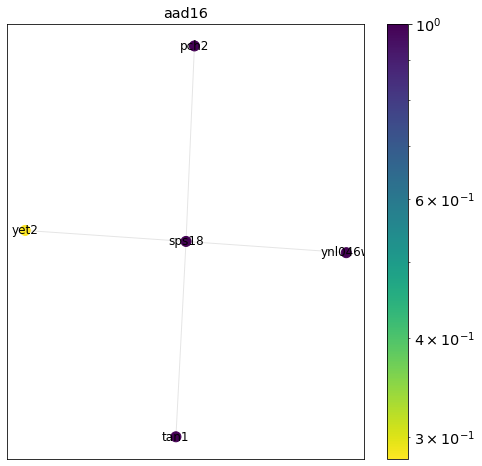

['sps18', 'ynl046w', 'pch2', 'tan1', 'yet2']


[1.0,
 0.9998186557068237,
 0.9998186557068223,
 0.9998186557068256,
 0.28131107147663337]

In [228]:
vr = plot_prs_subnetwork(e_pcc.graph_gc,e_pcc,attr='eff',node_name='sps18',radius=1,node_size=100,figsize=(8,8),with_labels=True)    
vr

In [120]:
df.loc[df.orf_name.isin(['sps18', 'ynl046w', 'pch2', 'tan1', 'yet2'])]

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,norm_eff
4772,sps18,4,0.002833,0.000030,-0.003151,-0.007636,-0.001362,0.000873,0.001824,-0.001158,3.290292,11.257902,0.002315,0.0,5.832900e-09,0.159138,0.822573
4773,pch2,1,-0.002179,-0.000324,0.001489,0.005572,0.001009,-0.000282,-0.001398,0.000275,1.523264,13.331364,0.000000,0.0,9.780718e-11,0.137293,1.523264
5047,tan1,1,-0.002179,-0.000324,0.001489,0.005572,0.001009,-0.000282,-0.001398,0.000275,1.523264,13.331364,0.000000,0.0,9.780718e-11,0.137293,1.523264
5048,yet2,2,0.011352,0.001060,-0.007255,-0.029162,-0.005277,0.000759,0.007284,0.000575,4.018074,4.845548,0.003086,0.0,3.475616e-07,0.189207,2.009037
5049,ynl046w,1,-0.002179,-0.000324,0.001489,0.005572,0.001009,-0.000282,-0.001398,0.000275,1.523264,13.331364,0.000000,0.0,9.780718e-11,0.137293,1.523264


NodeView(('icp55', 'mdh3', 'rcf1', 'phb1-supp1', 'ygr035w-a', 'aad16', 'cyt2', 'pau9', 'upc2', 'ypr108w-a', 'qcr6', 'ydr381c-a'))

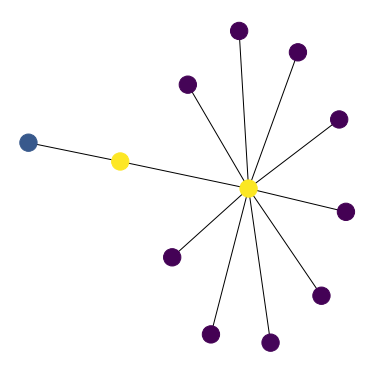

In [17]:
node_name = 'aad16'
nx.set_node_attributes(e_pcc.graph_gc,dict(zip(e_pcc.nodes,e_pcc.prs_mat[:,e_pcc.nodes.index(node_name)])),'eff')
g_sub = nx.ego_graph(e_pcc.graph_gc, node_name,2)#['red'  if i==node_name else 'blue' for i in g_sub.nodes ]
nx.draw(g_sub,node_color = [val for i, val in g_sub.nodes('eff')])

g_sub.nodes

In [67]:
g_sub.nodes('eff')

NodeDataView({'ydr381c-a': 0.03020475059955035, 'ypr108w-a': 0.025039031113629585, 'pau9': 0.025160412793150864, 'cyt2': 0.02789252767779833, 'upc2': 0.2897969293904156, 'aad16': 1.0, 'ygr035w-a': 0.02524022761374771, 'qcr6': 0.9953779551687375, 'icp55': 0.020303647526073297, 'mdh3': 0.02030364752607329, 'phb1-supp1': 0.024505812724498463, 'rcf1': 0.03516521969776593}, data='eff')

In [103]:
df.loc[df.orf_name.isin(['akr2', 'ypr039w','tip41','irc21'])]

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,norm_eff
983,ypr039w,2,0.016159,0.000316,0.012675,0.003137,-0.012458,-0.000586,-0.010021,-0.001287,1.410226,6.487102,0.000772,0.0,4.636511e-10,0.143530,0.705113
984,akr2,1,-0.012427,-0.003384,-0.005991,-0.002289,0.009230,0.000189,0.007680,0.000306,0.526964,7.842728,0.000000,0.0,7.774590e-12,0.125518,0.526964
4334,irc21,4,0.004395,0.004529,-0.019204,0.000363,-0.002013,0.002845,-0.002622,-0.020614,2.934006,4.031868,0.000000,1.0,2.763521e-08,0.167556,0.733501
4338,tip41,5,0.007575,0.003670,-0.008152,0.001127,-0.004875,0.001041,-0.004625,0.003826,4.089120,4.272030,0.001544,0.6,2.764286e-08,0.167567,0.817824


In [162]:
from sklearn.linear_model import LinearRegression
x = df[['eff']]
y = df.btw.values
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
r_sq = model.score(x,y)

In [169]:
model.coef_

0.0007783976283340686

# Work on random generated graph



In [361]:
gc = nx.Graph()

In [362]:
gc.add_nodes_from(range(12))

In [363]:
edges = [(0,1),
        (0,2),
        (1,2),
        (1,3),
        #(1,13),
        (3,4),
        (3,5),
        (2,10),
        (10,9),
        (10,11),
        (0,7),
        (7,8),
        (7,6)]
gc.add_edges_from(edges)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


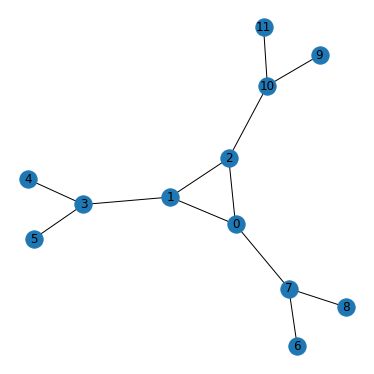

In [364]:
nx.draw(gc,with_labels=True)

In [365]:
e_sm = Enm('small')
e_sm.G = gc
e_sm.giant_component()
e_sm.gnm_analysis()

@> 11 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [366]:
e_sm.gnm_analysis()

@> 11 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [340]:
e_sm.df.loc[:,['orf_name','deg','eff','sens']]

,orf_name,deg,eff,sens
0,0,3,1.621452,0.259242
1,1,4,2.605142,0.274720
2,2,3,1.621452,0.259242
3,3,3,3.065236,1.404258
4,4,1,0.947111,2.367089
5,5,1,0.373183,0.867617
6,6,1,0.950858,2.507449
7,7,3,2.931541,1.509075
8,8,1,0.950858,2.507449
9,9,1,0.950858,2.507449


In [368]:
pos = nx.spring_layout(gc)

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


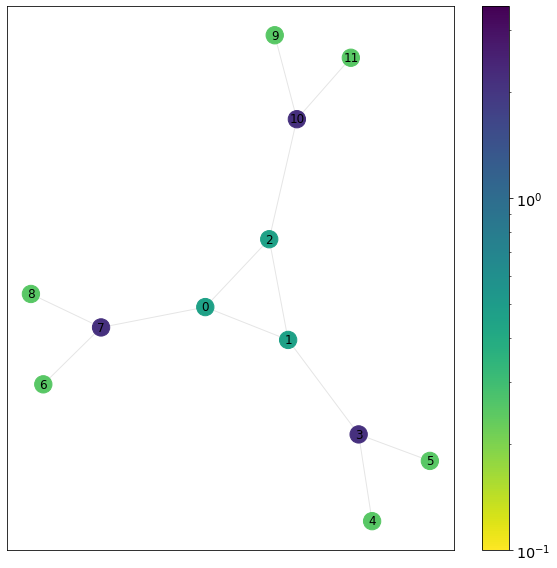

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


[0.1, 3.5]

In [369]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.eff)),'eff')
plot_subnetwork(e_sm.graph_gc,'eff',with_labels=True, pos=pos, val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/eff.png')

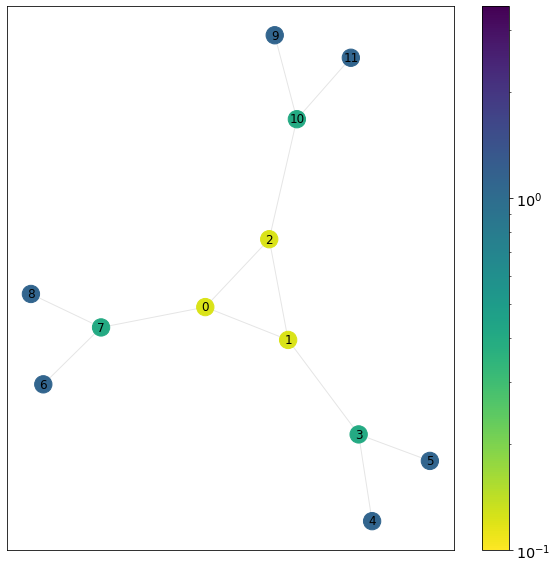

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


[0.1, 3.5]

In [370]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.sens)),'sens')
plot_subnetwork(e_sm.graph_gc,'sens',with_labels=True,pos=pos,val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/sens.png')

In [371]:
gc.remove_edge(3,5)
gc.add_edge(1,5)

e_sm = Enm('small')
e_sm.G = gc
e_sm.giant_component()
e_sm.gnm_analysis()

@> 11 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


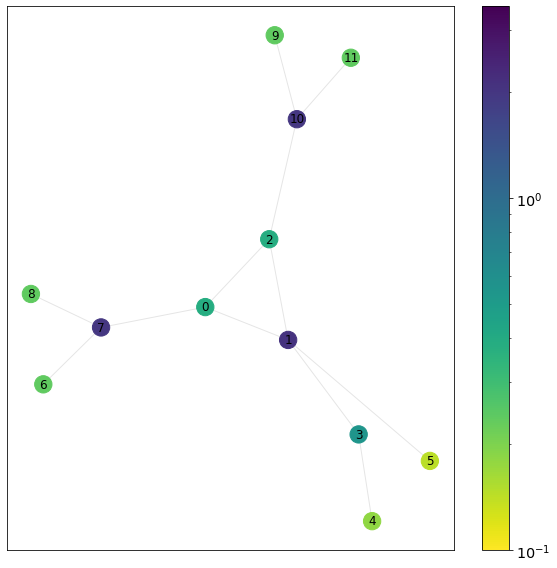

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


[0.1, 3.5]

In [372]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.eff)),'eff')
plot_subnetwork(e_sm.graph_gc,'eff',with_labels=True, pos=pos, val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/eff_ch.png')

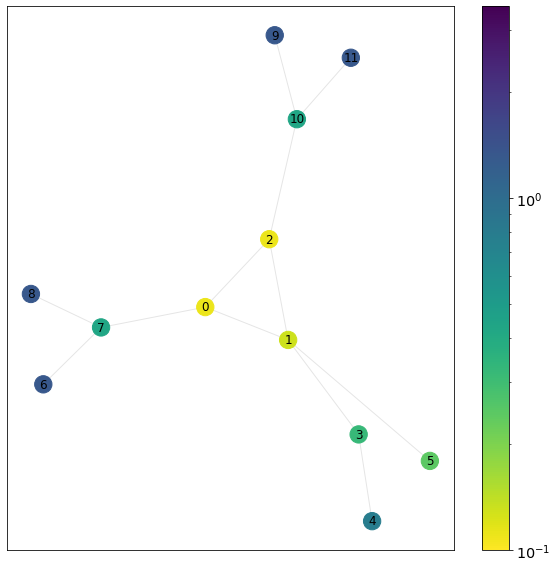

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


[0.1, 3.5]

In [373]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.sens)),'sens')
plot_subnetwork(e_sm.graph_gc,'sens',with_labels=True,pos=pos,val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/sens_ch.png')

In [367]:
e_sm.df.loc[:,['orf_name','deg','eff','sens']]

,orf_name,deg,eff,sens
0,0,3,1.553373,0.287031
1,1,3,1.553373,0.287031
2,2,3,1.553373,0.287031
3,3,3,3.027279,1.437273
4,4,1,0.977259,2.405433
5,5,1,0.977259,2.405433
6,6,1,0.977259,2.405433
7,7,3,3.027279,1.437273
8,8,1,0.977259,2.405433
9,9,1,0.977259,2.405433


Help on function plot_network_spring in module src.visualize.visualize:

plot_network_spring(Gc, figure_path, plot_go=False, go_df_list=None, level_list=[0.1], **kwargs)
    Plots networkx object using spring_layout and a legend for nodes and edges
    
    :param Gc:  The network to plot
    :type Gc: networkx object
    :param figure_path: Folder to save plotted figure
    :type figure_path: string
    :return: returns Axes for downstream pipeline
    :rtype: Axes



In [375]:
#gc.remove_edge(3,5)
gc.add_edge(3,13)

e_sm = Enm('small')
e_sm.G = gc
e_sm.giant_component()
e_sm.gnm_analysis()

@> 12 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [376]:
pos[13]=np.array([0.77917648,-0.86070557])

/home/oma21/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


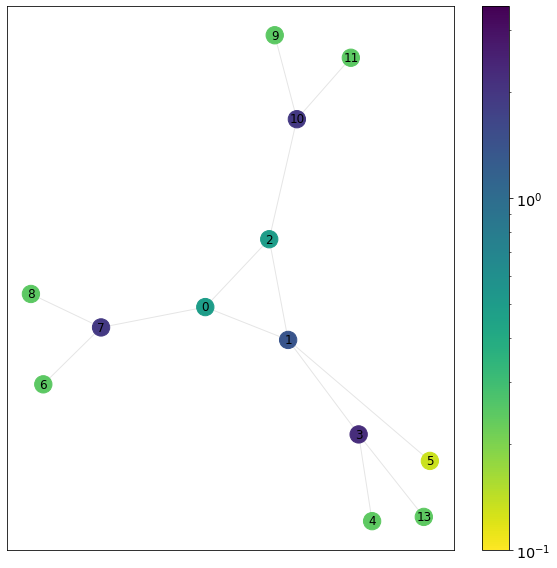

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


[0.1, 3.5]

In [377]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.eff)),'eff')
plot_subnetwork(e_sm.graph_gc,'eff',with_labels=True, pos=pos, val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/eff_ch2.png')

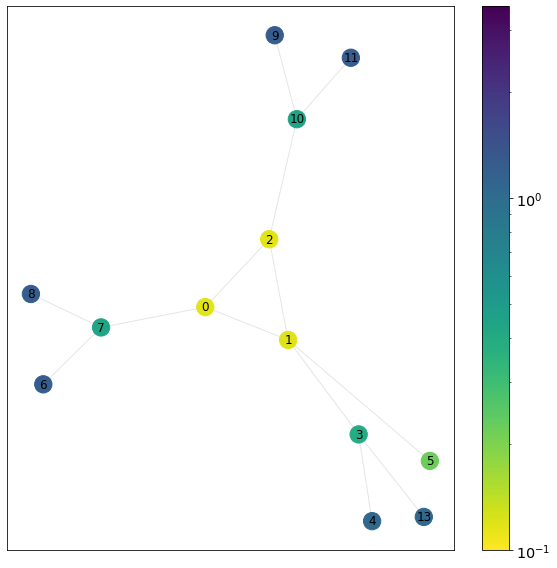

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


[0.1, 3.5]

In [378]:
nx.set_node_attributes(e_sm.graph_gc,dict(zip(e_sm.df.orf_name,e_sm.df.sens)),'sens')
plot_subnetwork(e_sm.graph_gc,'sens',with_labels=True,pos=pos,val_range=[0.1,3.5],filename= 'reports/figures/sample_network_0729/sens_ch2.png')

In [374]:
e_sm.df.loc[:,['orf_name','deg','eff','sens']]

,orf_name,deg,eff,sens
0,0,3,1.400000,0.204946
1,1,4,3.000000,0.359675
2,2,3,1.400000,0.204946
3,3,2,1.721893,1.221210
4,4,1,0.663516,2.076269
5,5,1,0.457778,0.959444
6,6,1,0.931973,2.576956
7,7,3,2.966942,1.485325
8,8,1,0.931973,2.576956
9,9,1,0.931973,2.576956


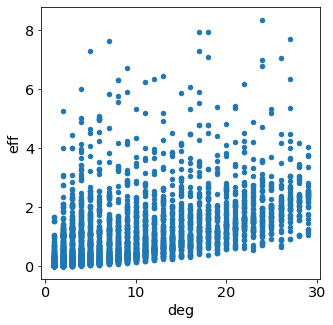

In [386]:
e_pcc.df.loc[(e_pcc.df.deg<30 )&( e_pcc.df.eff<10)].plot.scatter('deg','eff')

In [400]:
nx.set_node_attributes(e_pcc.graph_gc,dict(zip(e_pcc.df.orf_name,e_pcc.df.eff)),'eff')
nx.set_node_attributes(e_pcc.graph_gc,dict(zip(e_pcc.df.orf_name,e_pcc.df.sens)),'sens')

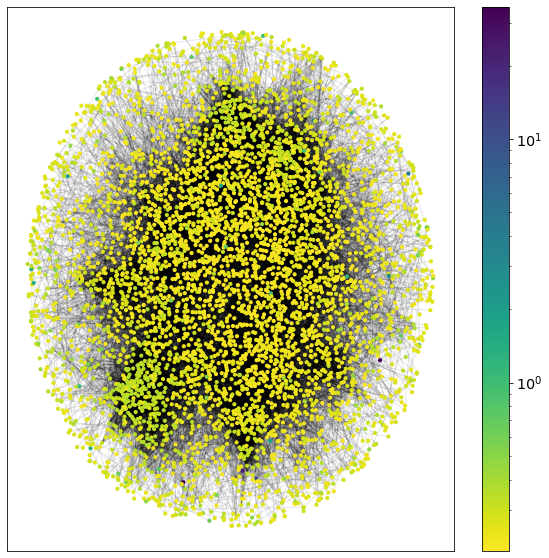

In [406]:
val  = plot_subnetwork(e_pcc.graph_gc, pos=e_pcc.graph_gc.nodes('pos'),attr='sens', node_size=10)

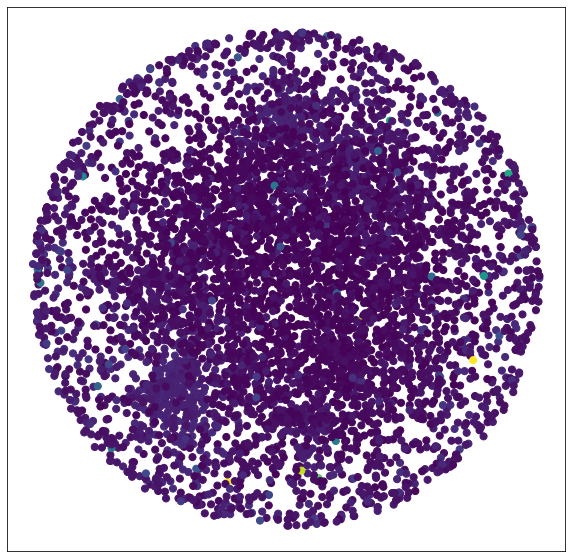

In [399]:
e_pcc.plot_network_spring(node_color = e_pcc.df.sens.values,facecolor='white',figsize=(10,10),node_size=50)

In [392]:
from src.visualize.visualize import plot_network_spring

In [410]:
import seaborn as sns

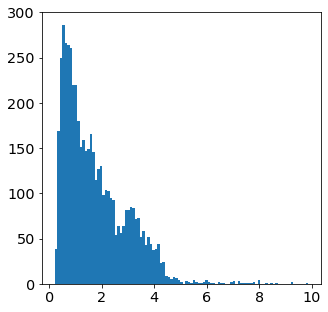

In [420]:

s = plt.hist([i for i in e_pcc.df.sens if i <10],bins=101)

In [3]:

s = plt.hist([i for i in e_pcc.df.eff if i <10],bins=101)

NameError: name 'plt' is not defined